# DOGECOIN PRICE PREDICTION

In [1]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
pd.set_option("display.max_columns",100)
import numpy as np

from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
#plt.style.use('')

In [3]:
df = pd.read_csv('DOGE-USD.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       366 non-null    object 
 1   Open       366 non-null    float64
 2   High       366 non-null    float64
 3   Low        366 non-null    float64
 4   Close      366 non-null    float64
 5   Adj Close  366 non-null    float64
 6   Volume     366 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 20.1+ KB


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,366.000000,366.000000,366.000000,366.000000,366.000000,3.660000e+02
mean,0.076260,0.078586,0.074269,0.076255,0.076255,6.098424e+08
std,0.013266,0.015279,0.012157,0.013281,0.013281,1.024345e+09
min,0.058583,0.059199,0.055741,0.058580,0.058580,9.248368e+07
25%,0.065713,0.067181,0.064528,0.065718,0.065718,2.319260e+08
50%,0.074133,0.076003,0.072683,0.074131,0.074131,3.651564e+08
75%,0.083395,0.086001,0.080733,0.083509,0.083509,5.631596e+08
max,0.142524,0.157203,0.125177,0.142575,0.142575,1.215764e+10


In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-10,0.062151,0.062469,0.059513,0.059513,0.059513,254559947
1,2022-10-11,0.059508,0.060653,0.057887,0.060258,0.060258,295967661
2,2022-10-12,0.060259,0.060866,0.059540,0.059881,0.059881,199133108
3,2022-10-13,0.059871,0.060159,0.055741,0.059674,0.059674,466439562
4,2022-10-14,0.059666,0.060943,0.058315,0.058643,0.058643,242691429


In [7]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
361,2023-10-06,0.060920,0.061555,0.060821,0.061426,0.061426,109783884
362,2023-10-07,0.061425,0.061669,0.061129,0.061455,0.061455,97620505
363,2023-10-08,0.061456,0.061611,0.060876,0.061008,0.061008,92483679
364,2023-10-09,0.061010,0.061030,0.058260,0.058779,0.058779,241183528
365,2023-10-10,0.058803,0.059199,0.058612,0.058849,0.058849,168650992


In [8]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.956763,0.980180,0.955344,0.955344,0.520559
High,0.956763,1.000000,0.949662,0.982304,0.982304,0.712778
Low,0.980180,0.949662,1.000000,0.975285,0.975285,0.490281
Close,0.955344,0.982304,0.975285,1.000000,1.000000,0.626639
Adj Close,0.955344,0.982304,0.975285,1.000000,1.000000,0.626639
Volume,0.520559,0.712778,0.490281,0.626639,0.626639,1.000000


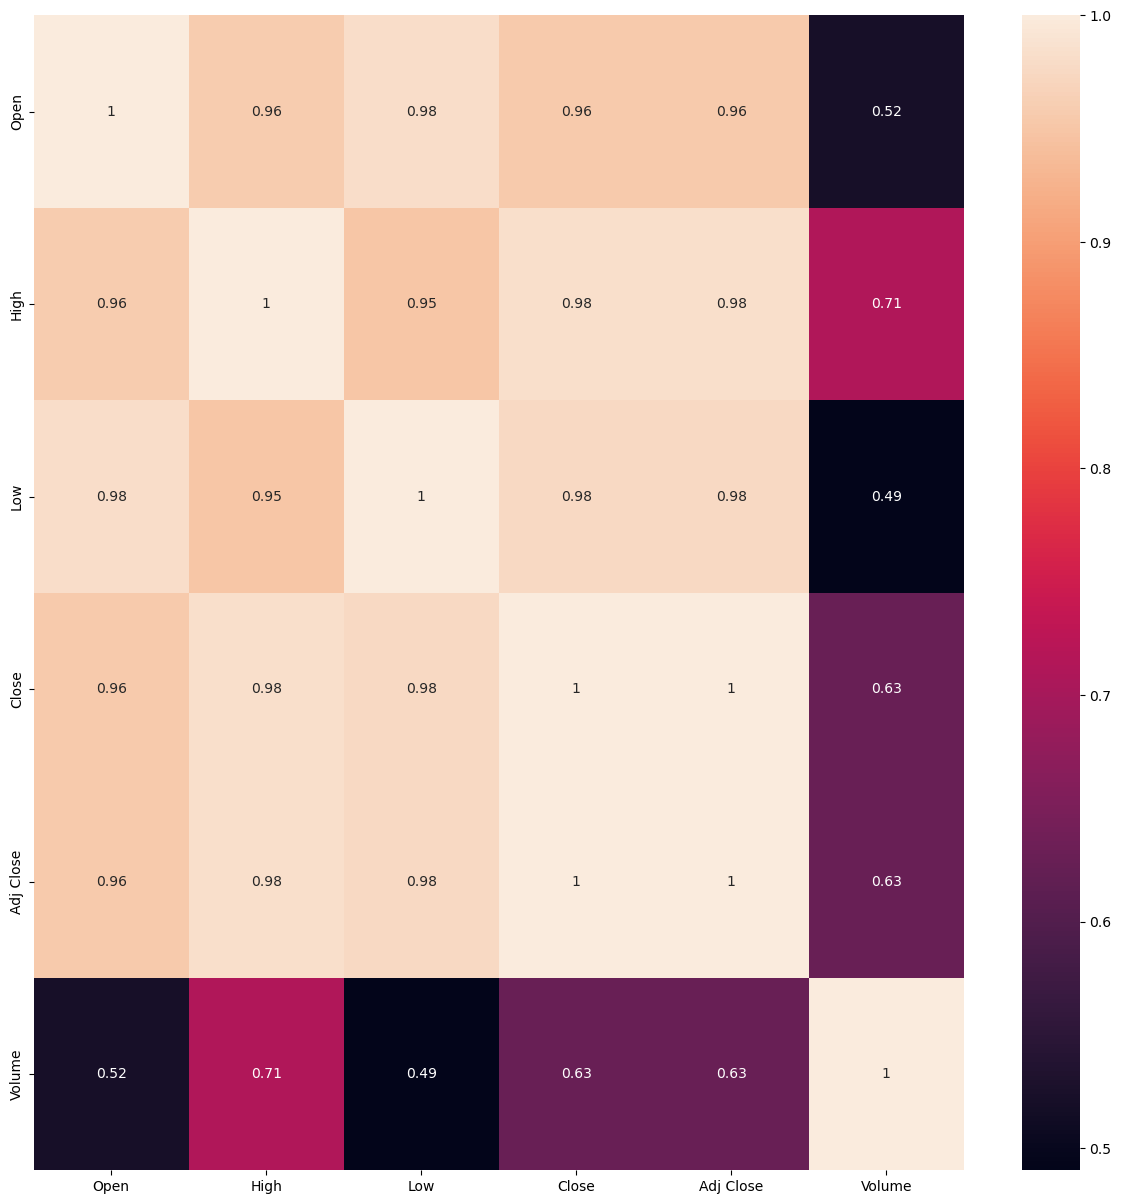

In [9]:
ax = plt.subplots(figsize = (15,15))
sns.heatmap(df.corr(),annot = True);

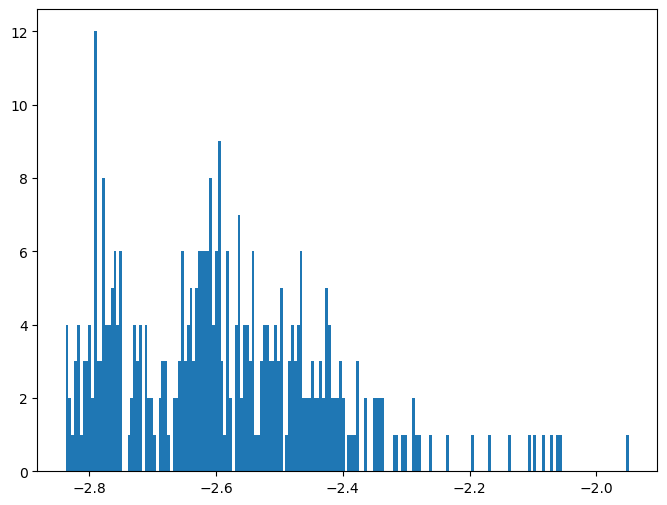

In [10]:
plt.figure(figsize=(8,6))
plt.hist((np.log(df.Close)), bins=200);

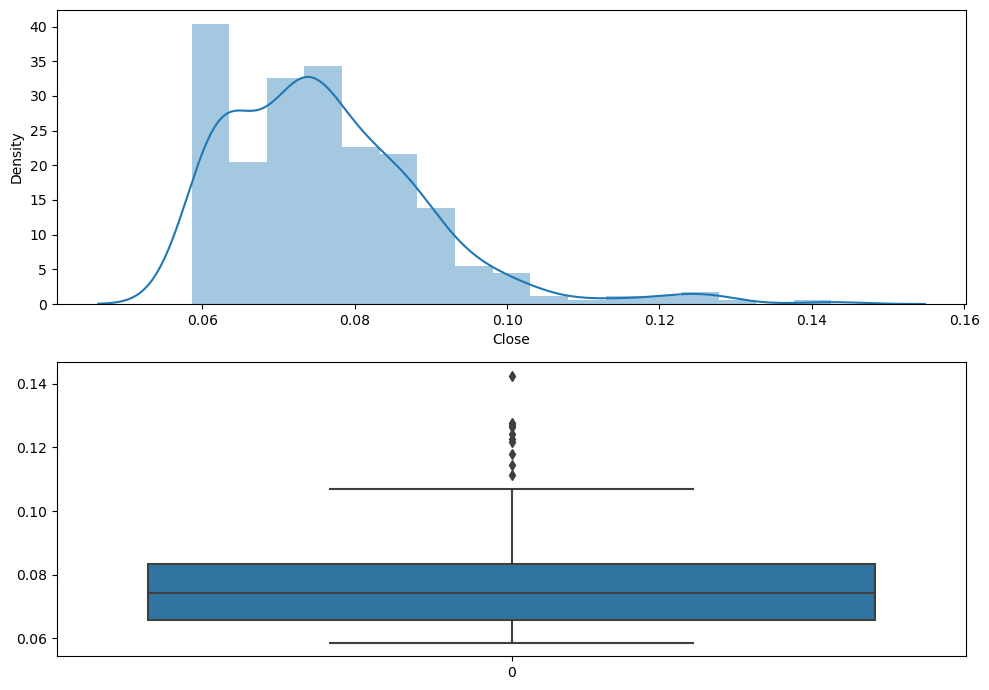

In [11]:
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(df['Close'])
fig.add_subplot(2,1,2)
sns.boxplot(df['Close'])
plt.tight_layout();

<Axes: >

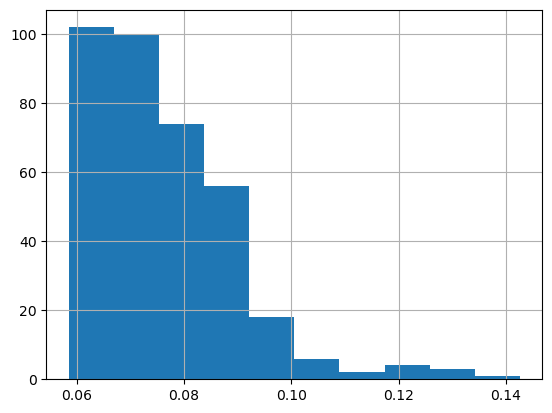

In [12]:
df.Close.hist()

In [13]:
df['Date'] = pd.to_datetime(df['Date'])

In [14]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-10,0.062151,0.062469,0.059513,0.059513,0.059513,254559947
1,2022-10-11,0.059508,0.060653,0.057887,0.060258,0.060258,295967661
2,2022-10-12,0.060259,0.060866,0.059540,0.059881,0.059881,199133108
3,2022-10-13,0.059871,0.060159,0.055741,0.059674,0.059674,466439562
4,2022-10-14,0.059666,0.060943,0.058315,0.058643,0.058643,242691429


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       366 non-null    datetime64[ns]
 1   Open       366 non-null    float64       
 2   High       366 non-null    float64       
 3   Low        366 non-null    float64       
 4   Close      366 non-null    float64       
 5   Adj Close  366 non-null    float64       
 6   Volume     366 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 20.1 KB


In [16]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-10,0.062151,0.062469,0.059513,0.059513,0.059513,254559947
1,2022-10-11,0.059508,0.060653,0.057887,0.060258,0.060258,295967661
2,2022-10-12,0.060259,0.060866,0.059540,0.059881,0.059881,199133108
3,2022-10-13,0.059871,0.060159,0.055741,0.059674,0.059674,466439562
4,2022-10-14,0.059666,0.060943,0.058315,0.058643,0.058643,242691429


In [17]:
reduceData=df.iloc[:,[1,4]]

In [18]:
reduceData["AveragePrice"]=(reduceData["Open"]+reduceData["Close"])/2

In [19]:
reduceData.head()

,Open,Close,AveragePrice
0,0.062151,0.059513,0.060832
1,0.059508,0.060258,0.059883
2,0.060259,0.059881,0.060070
3,0.059871,0.059674,0.059772
4,0.059666,0.058643,0.059154


In [20]:
myPrice=reduceData.loc[:,"AveragePrice"]
myPrice.head()

0    0.060832
1    0.059883
2    0.060070
3    0.059772
4    0.059154
Name: AveragePrice, dtype: float64

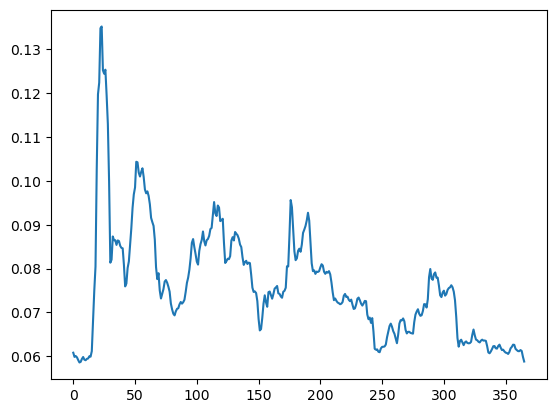

In [21]:
plt.plot(myPrice)

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(myPrice, model='additive', period=3) 

In [23]:
trend = result.trend
seasonal = result.seasonal
residual = result.resid

In [24]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-10,0.062151,0.062469,0.059513,0.059513,0.059513,254559947
1,2022-10-11,0.059508,0.060653,0.057887,0.060258,0.060258,295967661
2,2022-10-12,0.060259,0.060866,0.059540,0.059881,0.059881,199133108
3,2022-10-13,0.059871,0.060159,0.055741,0.059674,0.059674,466439562
4,2022-10-14,0.059666,0.060943,0.058315,0.058643,0.058643,242691429


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       366 non-null    datetime64[ns]
 1   Open       366 non-null    float64       
 2   High       366 non-null    float64       
 3   Low        366 non-null    float64       
 4   Close      366 non-null    float64       
 5   Adj Close  366 non-null    float64       
 6   Volume     366 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 20.1 KB


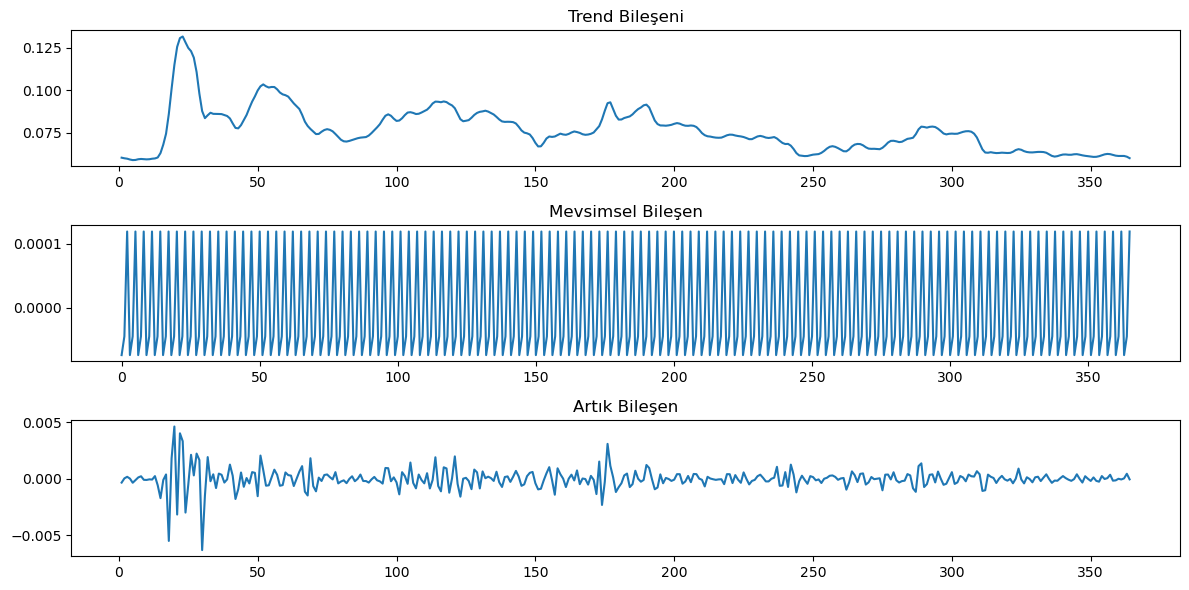

In [26]:
plt.figure(figsize=(12, 6))
plt.subplot(311)
plt.plot(trend)
plt.title('Trend Bileşeni')

# Mevsimsel bileşeni görselleştirme
plt.subplot(312)
plt.plot(seasonal)
plt.title('Mevsimsel Bileşen')

# Artık (residual) bileşeni görselleştirme
plt.subplot(313)
plt.plot(residual)
plt.title('Artık Bileşen')

plt.tight_layout()
plt.show()

<Axes: >

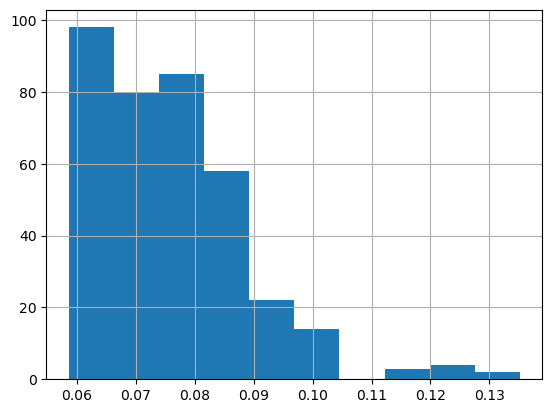

In [27]:
myPrice.hist()

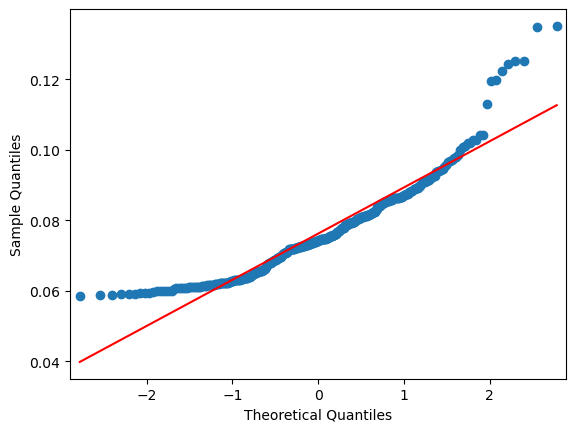

In [28]:
#q-q plot
from statsmodels.graphics.gofplots import qqplot
qqplot(myPrice,line="s")
plt.show()

In [29]:
#Shapiro-Wilk test is a hypothesis test that evaluates whether a data set is normally distributed.
from scipy.stats import shapiro

In [30]:
def shapiroTest(ts):
    val=shapiro(ts)
    statistic=round(val[0],3)
    pval=round(val[1],3)
    criticalVal=0.05
    if pval>criticalVal:
        print("a Gaussioan case")
    else:
        print("a non Gaussian case")

In [31]:
shapiroTest(myPrice)
# Normal dağılmıyormuş bu iyi birşey değil maalesef ama yine de analizime devam edeceğim kaç data set normal dağılıyorki zaten

a non Gaussian case


In [32]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-10,0.062151,0.062469,0.059513,0.059513,0.059513,254559947
1,2022-10-11,0.059508,0.060653,0.057887,0.060258,0.060258,295967661
2,2022-10-12,0.060259,0.060866,0.059540,0.059881,0.059881,199133108
3,2022-10-13,0.059871,0.060159,0.055741,0.059674,0.059674,466439562
4,2022-10-14,0.059666,0.060943,0.058315,0.058643,0.058643,242691429


In [33]:
# variance test
def rolling_Mean_STD(timeseries):
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    
    orig=plt.plot(timeseries,color="blue",label="Original")
    mean=plt.plot(rolmean,color="red",label="Rolling Mean")
    std=plt.plot(rolstd,color="black",label="Rolling Std")
    
    plt.legend(loc="best")
    plt.title("Rolling Mean & Standard Deviation")
    plt.show(block=False)

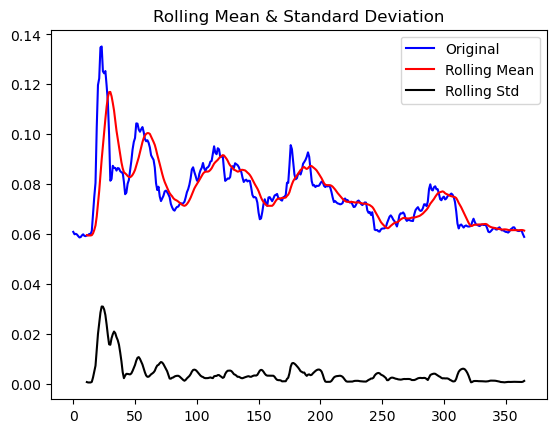

In [34]:
rolling_Mean_STD(myPrice)

In [35]:
def mean_checker(timeseries):
    thres=int(len(timeseries)/3)
    firstPart=timeseries[1:thres]
    secondPart=timeseries[(thres+1):(2*thres)]
    thirdPart=timeseries[(2*thres+1):]
    
    print("the length of the first part is",len(firstPart))
    print("the length of the secondPart part is",len(secondPart))
    print("the length of the thirdPart part is",len(thirdPart))
    
    print("-"*30)
    firstMean=firstPart.mean()
    secondMean=secondPart.mean()
    thirdMean=thirdPart.mean()
    print("-"*30)
    print('The mean of the first part is',firstMean)
    print('The mean of the second part is',secondMean)
    print('The mean of the third part is',thirdMean) 

In [36]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-10,0.062151,0.062469,0.059513,0.059513,0.059513,254559947
1,2022-10-11,0.059508,0.060653,0.057887,0.060258,0.060258,295967661
2,2022-10-12,0.060259,0.060866,0.059540,0.059881,0.059881,199133108
3,2022-10-13,0.059871,0.060159,0.055741,0.059674,0.059674,466439562
4,2022-10-14,0.059666,0.060943,0.058315,0.058643,0.058643,242691429


In [37]:
mean_checker(myPrice)

the length of the first part is 121
the length of the secondPart part is 121
the length of the thirdPart part is 121
------------------------------
------------------------------
The mean of the first part is 0.08470922314049587
The mean of the second part is 0.0778785867768595
The mean of the third part is 0.06635432644628099


In [38]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-10,0.062151,0.062469,0.059513,0.059513,0.059513,254559947
1,2022-10-11,0.059508,0.060653,0.057887,0.060258,0.060258,295967661
2,2022-10-12,0.060259,0.060866,0.059540,0.059881,0.059881,199133108
3,2022-10-13,0.059871,0.060159,0.055741,0.059674,0.059674,466439562
4,2022-10-14,0.059666,0.060943,0.058315,0.058643,0.058643,242691429


In [39]:
# Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
def stationarity_test(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest=adfuller(timeseries,autolag="AIC")
    dfoutput=pd.Series(dftest[0:4],index=["Test Statistic","p-value",
                                          "#Lags Uset",
                                          "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key]=value
    print(dfoutput)

In [40]:
stationarity_test(myPrice)
#zaman serilerinde stationarity'nin olup olmadiginin testidir.

#hipotezi, zaman serisinin non-stationary (unit-root) oldugu,
#alternatif hipotezi ise zaman serisinin stationary oldugudur.
# p değeri 0.05den küük old için h0 reject edilir. yani veri statinarydir

Results of Dickey-Fuller Test:
Test Statistic                  -3.288004
p-value                          0.015423
#Lags Uset                      11.000000
Number of Observations Used    354.000000
Critical Value (1%)             -3.448958
Critical Value (5%)             -2.869739
Critical Value (10%)            -2.571138
dtype: float64


In [41]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-10,0.062151,0.062469,0.059513,0.059513,0.059513,254559947
1,2022-10-11,0.059508,0.060653,0.057887,0.060258,0.060258,295967661
2,2022-10-12,0.060259,0.060866,0.059540,0.059881,0.059881,199133108
3,2022-10-13,0.059871,0.060159,0.055741,0.059674,0.059674,466439562
4,2022-10-14,0.059666,0.060943,0.058315,0.058643,0.058643,242691429


In [42]:
autocorrelation_lag1 = df['Close'].autocorr(lag=1)
print("One Month Lag: ", autocorrelation_lag1)
#Yüksek otokorelasyon var

One Month Lag:  0.9550646933942338


In [43]:
# Autocorrelation test
autocorrelation_lag3 = df['Close'].autocorr(lag=3)
print("Three Month Lag: ", autocorrelation_lag3)

autocorrelation_lag6 = df['Close'].autocorr(lag=6)
print("Six Month Lag: ", autocorrelation_lag6)

autocorrelation_lag9 = df['Close'].autocorr(lag=9)
print("Nine Month Lag: ", autocorrelation_lag9)

# her üç aylık dilime göre baktığımızda korelasyon düsüyor

Three Month Lag:  0.8573689512502342
Six Month Lag:  0.6463595280331236
Nine Month Lag:  0.456518941491643


In [44]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-10,0.062151,0.062469,0.059513,0.059513,0.059513,254559947
1,2022-10-11,0.059508,0.060653,0.057887,0.060258,0.060258,295967661
2,2022-10-12,0.060259,0.060866,0.059540,0.059881,0.059881,199133108
3,2022-10-13,0.059871,0.060159,0.055741,0.059674,0.059674,466439562
4,2022-10-14,0.059666,0.060943,0.058315,0.058643,0.058643,242691429


In [45]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-10,0.062151,0.062469,0.059513,0.059513,0.059513,254559947
1,2022-10-11,0.059508,0.060653,0.057887,0.060258,0.060258,295967661
2,2022-10-12,0.060259,0.060866,0.059540,0.059881,0.059881,199133108
3,2022-10-13,0.059871,0.060159,0.055741,0.059674,0.059674,466439562
4,2022-10-14,0.059666,0.060943,0.058315,0.058643,0.058643,242691429


In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

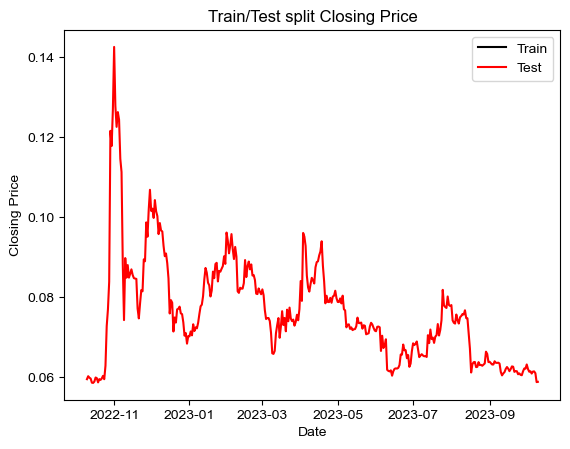

In [47]:
train = df[df['Date'] < pd.to_datetime("1960-08-01")]
test = df[df['Date'] >= pd.to_datetime("1960-08-01")]

# Grafiği çizin
plt.plot(train['Date'], train['Close'], color="black", label="Train")
plt.plot(test['Date'], test['Close'], color="red", label="Test")
plt.title("Train/Test split Closing Price")
plt.ylabel("Closing Price")
plt.xlabel('Date')
plt.legend()
sns.set()
plt.show()

In [48]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-10,0.062151,0.062469,0.059513,0.059513,0.059513,254559947
1,2022-10-11,0.059508,0.060653,0.057887,0.060258,0.060258,295967661
2,2022-10-12,0.060259,0.060866,0.059540,0.059881,0.059881,199133108
3,2022-10-13,0.059871,0.060159,0.055741,0.059674,0.059674,466439562
4,2022-10-14,0.059666,0.060943,0.058315,0.058643,0.058643,242691429


In [49]:
pip install pmdarima


Note: you may need to restart the kernel to use updated packages.


In [51]:
from pmdarima.arima import auto_arima
model = auto_arima(train['Close'], trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train['Close'])
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast, index=test.index, columns=['Prediction'])


ValueError: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.

In [52]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rms = sqrt(mean_squared_error(test,forecast))
print("RMSE: ", rms)

NameError: name 'forecast' is not defined